# Testing our DFT

A good thing to check is that if we compute the DFT and then the inverse DFT of the result, do we get the original data back (up to roundoff error)?

First let's copy over our `dft()` function and write the inverse transform

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def dft(f_n):
    """perform a discrete Fourier transform"""
    
    N = len(f_n)
    n = np.arange(N)
    
    f_k = np.zeros((N), dtype=np.complex128)

    for k in range(N):
        f_k[k] = np.sum(f_n * np.exp(-2.0 * np.pi * 1j * n * k / N))
    return f_k

In [3]:
def idft(F_k):
    """perform an inverse discrete Fourier transform"""
    
    N = len(F_k)
    k = np.arange(N)
    
    f_n = np.zeros((N), dtype=np.float64)

    for n in range(N):
        f_n[n] = (1/N) * np.sum(F_k * np.exp(2.0 * np.pi * 1j * n * k / N)).real
    return f_n

Now let's make a function that plots the original function, the DFT, the power spectrum, and the inverse transform of the DFT

In [4]:
def plot_dft(f, N=64, xmax=50):
    
    fig, ax = plt.subplots(nrows=4)
    
    x = np.linspace(0.0, xmax, N, endpoint=False)
    
    # get the transform   
    f_n = f(x)
    F_k_raw = dft(f_n)
    
    # normalize and cut off the duplicate data
    # since we are discarding 1/2 the data, the normalization if N/2
    F_k = F_k_raw[0:N//2] * 2 / N
    
    # compute the frequencies
    nu_k = np.arange(len(F_k)) / xmax
    
    # plot the original function
    ax[0].plot(x, f_n)
    ax[0].set_xlabel("$x$")
    ax[0].set_ylabel("$f(x)$")
    ax[0].set_xmargin(0.0)
    
    # plot the transform
    ax[1].plot(nu_k, F_k.real, label=r"$\mathrm{Re}(F_k)$")
    ax[1].plot(nu_k, F_k.imag, label=r"$\mathrm{Im}(F_k)$")    
    ax[1].set_xlabel(r"$\nu$")
    ax[1].set_ylabel("$F_k$")
    ax[1].set_xmargin(0.0)
    ax[1].legend(fontsize="small", ncol=2, frameon=False)
    
    # plot the power spectrum
    ax[2].plot(nu_k, np.abs(F_k)**2)
    ax[2].set_xlabel(r"$\nu$")
    ax[2].set_ylabel("$|F_k|^2$")
    ax[2].set_xmargin(0.0)
    
    # take the inverse transform -- note we need to use the unnormalized data
    f_n_new = idft(F_k_raw)
    ax[3].plot(x, f_n_new)
    ax[3].set_xlabel("$x$")
    ax[3].set_ylabel("$f(x)$")
    ax[3].set_xmargin(0.0)
    
    fig.tight_layout()
    
    return fig

## Transform of sin(x)

Now let's look at the transform of a single mode sine

In [5]:
def f_single_sine(x):
    nu_0 = 0.2
    return np.sin(2.0 * np.pi * nu_0 * x)

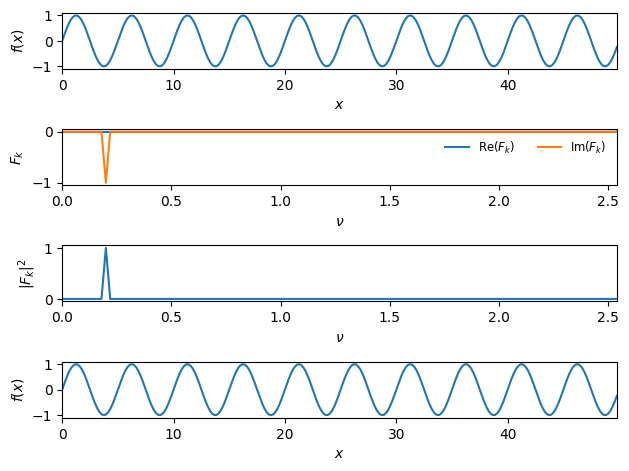

In [6]:
fig = plot_dft(f_single_sine, N=256)

We get what we expect:

* The transform only has non-zero weights in the imaginary part
* All of the power is at the single frequency that we constructed the sine with
* The inverse transform of the transformed data gives us back our original function

```{important}
The Fourier transform treats the data as if it is periodic (since the sine and cosine functions are).  The input data is assumed to be equally spaced and periodic.  The means that the first and last point need to be distinct.
```

The assumption of periodicity is why we construct the `x` data with `endpoint=False`&mdash;if we have data at endpoint, then the start and end refer to the exact same data sample, but the Fourier transform will treat them as if they are space $\Delta x$ apart, and we will pick up an extra signal.

```{admonition} try it
Try leaving off the `endpoint=False` and see what happens.
```

## Transform of cos(x)

Now let's look at cosine&mdash;it is the opposite of sine

In [7]:
def f_single_cosine(x):
    nu_0 = 0.2
    return np.cos(2.0 * np.pi * nu_0 * x)

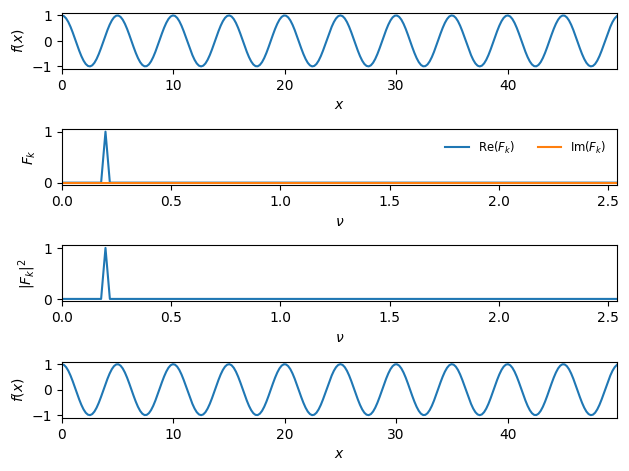

In [8]:
fig = plot_dft(f_single_cosine, N=256)

## Introducing a phase

A $\pi/4$ phase shift puts equal weight into the sine and cosine components:

In [9]:
def f_single_sine_phase(x):
    nu_0 = 0.2
    return np.sin(2.0 * np.pi * nu_0 * x + np.pi / 4)

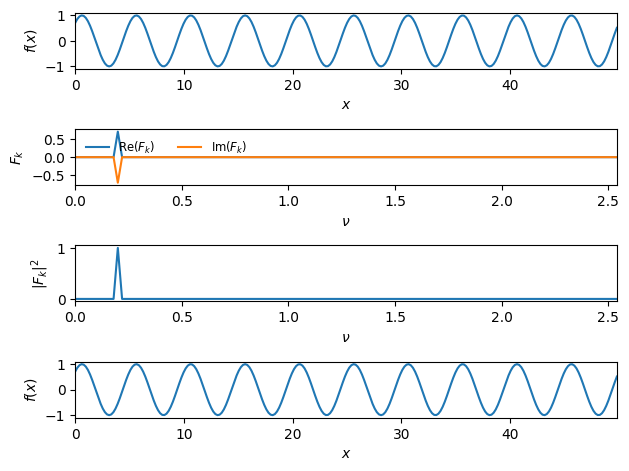

In [10]:
fig = plot_dft(f_single_sine_phase, N=256)

## Multiple frequencies

The two frequency version shows power at the two frequencies, as expect:

In [11]:
def f_two_freq(x):
    nu_0 = 0.2
    nu_1 = 0.5
    return 0.5 * (np.sin(2.0 * np.pi * nu_0 * x) +
                  np.sin(2.0 * np.pi * nu_1 * x))

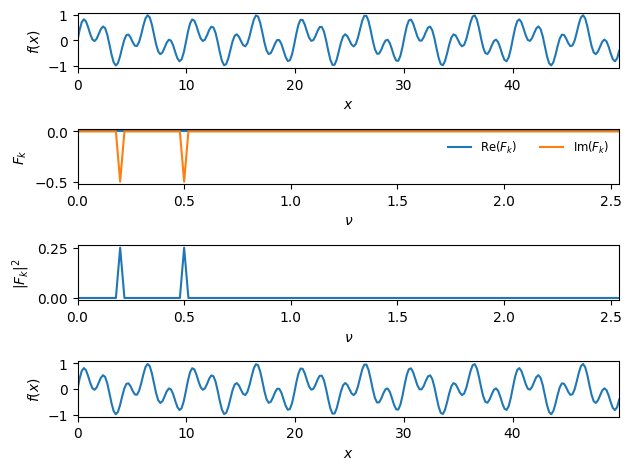

In [12]:
fig = plot_dft(f_two_freq, N=256)